Saving Kuesioner Identifikasi Mahasiswa Berdasarkan Motivasi Belajar, Distraksi Digital, dan Produktivitas Akademik (Jawaban) - Form Responses 1 (1).csv to Kuesioner Identifikasi Mahasiswa Berdasarkan Motivasi Belajar, Distraksi Digital, dan Produktivitas Akademik (Jawaban) - Form Responses 1 (1).csv
Data Cleaning selesai.
Transformasi selesai (open-ended).
One-Hot Encoding selesai untuk jawaban open-ended.
Proses Preprocessing Selesai!


,Semester,"Seberapa sering kamu merasa bersemangat mengikuti perkuliahan? \n\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)",Apa alasan utama kamu belajar?,"Ketika ada tugas, seberapa besar usahamu untuk mengerjakan lebih dari sekadar yang diminta dosen?\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Seberapa sering kamu menetapkan target belajar pribadi (misalnya jam belajar, capaian materi)?\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Dalam sehari, berapa jam rata-rata kamu gunakan untuk media sosial (Instagram, TikTok, X, dll) di luar kebutuhan kuliah?","Seberapa sering kamu terganggu notifikasi HP saat belajar?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Saat mengerjakan tugas, apakah kamu sering membuka aplikasi lain yang tidak relevan (misalnya scrolling sosmed)?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Pernahkah kamu merasa menunda belajar karena lebih memilih aktivitas digital (game, nonton, chat)?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Seberapa sering kamu menyelesaikan tugas sebelum deadline?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)",Berapa rata-rata jam belajar mandiri kamu per minggu (di luar kelas)?,"Saat belajar, apakah kamu mampu fokus tanpa banyak istirahat panjang?",Seberapa puas kamu dengan hasil belajar akademikmu selama ini?,NIM (opsional),Alasan_Karier,Alasan_Wawasan,Alasan_Sosial,Alasan_Personal
0,5,4,Persiapan karier,1,4,3,1,2,3,3,5,4.0,4.0,,1,0,0,0
1,5,3,Persiapan karier,2,3,4,3,4,4,3,1,1.0,3.0,,1,0,0,0
2,5,3,Persiapan karier,2,3,3,3,3,3,4,2,3.0,2.0,,1,0,0,0
3,1,1,Tugas/ujian,1,1,5,4,4,4,2,4,1.0,3.0,,0,0,0,0
4,3,3,Persiapan karier,2,3,3,3,2,2,2,5,2.0,3.0,,1,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Mencari jumlah cluster optimal dengan Silhouette...
k=2: Silhouette Score = 0.2356
k=3: Silhouette Score = 0.3646
k=4: Silhouette Score = 0.3395
k=5: Silhouette Score = 0.3212
k=6: Silhouette Score = 0.2860
k=7: Silhouette Score = 0.2902
k=8: Silhouette Score = 0.2737
k=9: Silhouette Score = 0.2283
k=10: Silhouette Score = 0.2195

Jumlah cluster terbaik menurut Silhouette: k=3 (score=0.3646)


,Semester,"Seberapa sering kamu merasa bersemangat mengikuti perkuliahan? \n\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)",Apa alasan utama kamu belajar?,"Ketika ada tugas, seberapa besar usahamu untuk mengerjakan lebih dari sekadar yang diminta dosen?\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Seberapa sering kamu menetapkan target belajar pribadi (misalnya jam belajar, capaian materi)?\n\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Dalam sehari, berapa jam rata-rata kamu gunakan untuk media sosial (Instagram, TikTok, X, dll) di luar kebutuhan kuliah?","Seberapa sering kamu terganggu notifikasi HP saat belajar?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Saat mengerjakan tugas, apakah kamu sering membuka aplikasi lain yang tidak relevan (misalnya scrolling sosmed)?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Pernahkah kamu merasa menunda belajar karena lebih memilih aktivitas digital (game, nonton, chat)?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)","Seberapa sering kamu menyelesaikan tugas sebelum deadline?\n(Silakan pilih salah satu jawaban berikut: Tidak Pernah, Jarang, Lumayan Sering, atau Sangat Sering)",Berapa rata-rata jam belajar mandiri kamu per minggu (di luar kelas)?,"Saat belajar, apakah kamu mampu fokus tanpa banyak istirahat panjang?",Seberapa puas kamu dengan hasil belajar akademikmu selama ini?,NIM (opsional),Alasan_Karier,Alasan_Wawasan,Alasan_Sosial,Alasan_Personal,Cluster
0,5,4,Persiapan karier,1,4,3,1,2,3,3,5,4.0,4.0,,1,0,0,0,1
1,5,3,Persiapan karier,2,3,4,3,4,4,3,1,1.0,3.0,,1,0,0,0,1
2,5,3,Persiapan karier,2,3,3,3,3,3,4,2,3.0,2.0,,1,0,0,0,1
3,1,1,Tugas/ujian,1,1,5,4,4,4,2,4,1.0,3.0,,0,0,0,0,1
4,3,3,Persiapan karier,2,3,3,3,2,2,2,5,2.0,3.0,,1,0,0,0,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

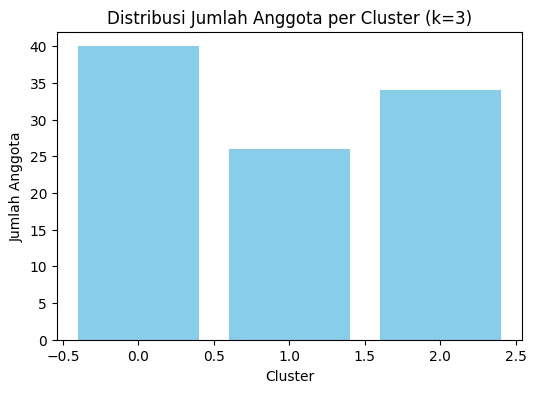

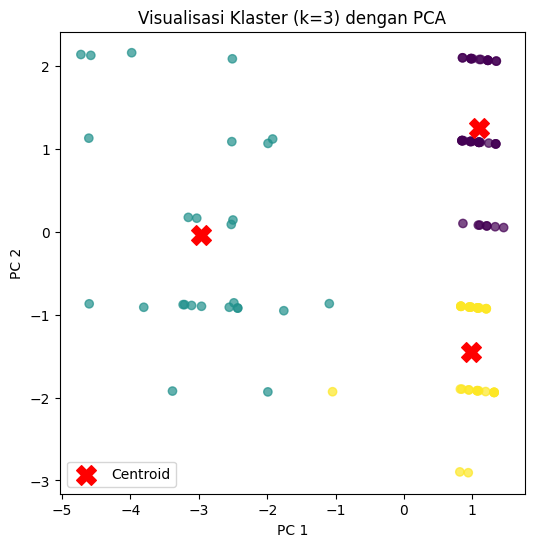

In [1]:
from google.colab import files
import csv
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1️⃣ Data Cleaning
# ===============================
def clean_data(rows, drop_cols):
    cleaned_rows = []
    for r in rows:
        new_r = {k.strip(): v.strip() if isinstance(v, str) else v for k, v in r.items()}
        final_row = {k: v for k, v in new_r.items() if k not in drop_cols}
        cleaned_rows.append(final_row)
    print("Data Cleaning selesai.")
    return cleaned_rows


# ===============================
# 2️⃣ Transformasi Data
# ===============================
def transform_data(rows):
    ordinal_maps = {
        "Dalam sehari, berapa jam rata-rata kamu gunakan untuk media sosial (Instagram, TikTok, X, dll) di luar kebutuhan kuliah?".strip():
            {'<1 jam': 1, '1–2 jam': 2, '3–4 jam': 3, '5–6 jam': 4, '>6 jam': 5},
        "Berapa rata-rata jam belajar mandiri kamu per minggu (di luar kelas)?".strip():
            {'<2 jam': 1, '2–4 jam': 2, '5–7 jam': 3, '8–10 jam': 4, '>10 jam': 5}
    }

    numeric_cols = [col.strip() for col in [
        "Seberapa sering kamu merasa bersemangat mengikuti perkuliahan?",
        "Ketika ada tugas, seberapa besar usahamu untuk mengerjakan lebih dari sekadar yang diminta dosen?",
        "Seberapa sering kamu menetapkan target belajar pribadi (misalnya jam belajar, capaian materi)?",
        "Seberapa sering kamu terganggu notifikasi HP saat belajar?",
        "Saat mengerjakan tugas, apakah kamu sering membuka aplikasi lain yang tidak relevan (misalnya scrolling sosmed)?",
        "Pernahkah kamu merasa menunda belajar karena lebih memilih aktivitas digital (game, nonton, chat)?",
        "Seberapa sering kamu menyelesaikan tugas sebelum deadline?",
        "Saat belajar, apakah kamu mampu fokus tanpa banyak istirahat panjang?",
        "Seberapa puas kamu dengan hasil belajar akademikmu selama ini?"
    ]]

    alasan_col = "Apa alasan utama kamu belajar?".strip()  # Open-ended

    for r in rows:
        # Ubah data ordinal
        for col_name, mapping in ordinal_maps.items():
            if col_name in r:
                r[col_name] = mapping.get(r[col_name], 0)

        # Ubah data numerik
        for col_name in numeric_cols:
            if col_name in r:
                try:
                    r[col_name] = float(r[col_name])
                except (ValueError, TypeError):
                    r[col_name] = 0.0

        # Pastikan jawaban open-ended berupa string
        if alasan_col in r:
            if not isinstance(r[alasan_col], str):
                r[alasan_col] = str(r[alasan_col])
            r[alasan_col] = r[alasan_col].strip()

    print("Transformasi selesai (open-ended).")
    return rows


# ===============================
# 3️⃣ Analisis OHE Jawaban Open-Ended
# ===============================
def scan_alasan_ohe(rows):
    alasan_col = "Apa alasan utama kamu belajar?".strip()

    # Daftar keyword per kategori
    keyword_map = {
        "Alasan_Karier": ["karier", "kerja", "profesi", "pekerjaan", "masa depan"],
        "Alasan_Wawasan": ["ilmu", "pengetahuan", "belajar", "wawasan", "intelektual"],
        "Alasan_Sosial": ["bantu", "masyarakat", "kontribusi", "bermanfaat", "orang lain"],
        "Alasan_Personal": ["hobi", "senang", "minat", "pengen", "ingin tahu"]
    }

    hasil = []
    for r in rows:
        text = str(r.get(alasan_col, "")).lower()
        new_row = dict(r)

        # Tambahkan kolom 1/0 untuk tiap kategori
        for kategori, keywords in keyword_map.items():
            found = 0
            for k in keywords:
                if k in text:
                    found = 1
                    break
            new_row[kategori] = found

        hasil.append(new_row)

    print("One-Hot Encoding selesai untuk jawaban open-ended.")
    return hasil


# ===============================
# 4️⃣ Clustering & Evaluasi Manual
# ===============================
def silhouette_score(X, labels):
    n = len(X)
    sil_scores = []
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == l] for l in np.unique(labels) if l != labels[i]]

        if len(same_cluster) > 1:
            a = np.mean([np.linalg.norm(X[i]-p) for p in same_cluster if not np.array_equal(p, X[i])])
        else:
            a = 0

        b = np.min([np.mean([np.linalg.norm(X[i]-p) for p in cluster]) for cluster in other_clusters])
        s = (b - a) / max(a, b) if max(a, b) > 0 else 0
        sil_scores.append(s)
    return np.mean(sil_scores)


def kmeans(X, k=3, max_iters=100):
    np.random.seed(42)
    random_idx = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_idx, :]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids
    return labels, centroids


def find_best_k(X, min_k=2, max_k=10):
    best_k = min_k
    best_score = -1
    scores = {}
    for k in range(min_k, max_k+1):
        labels, _ = kmeans(X, k=k)
        score = silhouette_score(X, labels)
        scores[k] = score
        print(f"k={k}: Silhouette Score = {score:.4f}")
        if score > best_score:
            best_score = score
            best_k = k
    return best_k, best_score, scores


# ===============================
# 5️⃣ Pipeline Utama
# ===============================
def run_pipeline(file_path):
    try:
        with open(file_path, "r", encoding="utf-8-sig") as f:
            reader = csv.DictReader(f)
            raw_rows = list(reader)
    except Exception as e:
        print(f"Gagal membaca file CSV. Error: {e}")
        return None

    cols_to_drop = [
        "Nama (opsional)", "Umur", "Timestamp",
        "Apakah kamu siap meluangkan waktu sekitar 5 menit untuk mengisi kuesioner ini?"
    ]

    # === Preprocessing ===
    cleaned_rows = clean_data(raw_rows, cols_to_drop)
    transformed_rows = transform_data(cleaned_rows)
    alasan_encoded = scan_alasan_ohe(transformed_rows)

    df_final = pd.DataFrame(alasan_encoded)
    print("Proses Preprocessing Selesai!")
    display(df_final.head())

    # Simpan hasil preprocessing
    df_final.to_csv("data_preprocessed.csv", index=False, encoding="utf-8-sig")
    files.download("data_preprocessed.csv")

    # === Clustering ===
    print("\nMencari jumlah cluster optimal dengan Silhouette...")
    X = df_final.select_dtypes(include=[np.number]).values.astype(float)

    best_k, best_score, scores = find_best_k(X, min_k=2, max_k=10)
    print(f"\nJumlah cluster terbaik menurut Silhouette: k={best_k} (score={best_score:.4f})")

    labels, centroids = kmeans(X, k=best_k)
    df_final['Cluster'] = labels
    display(df_final.head())

    # Simpan hasil clustering
    df_final.to_csv("data_clustered.csv", index=False, encoding="utf-8-sig")
    files.download("data_clustered.csv")

    # === Visualisasi Distribusi Cluster ===
    cluster_counts = df_final['Cluster'].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
    plt.xlabel("Cluster")
    plt.ylabel("Jumlah Anggota")
    plt.title(f"Distribusi Jumlah Anggota per Cluster (k={best_k})")
    plt.show()

    # === PCA Manual ===
    def pca_manual(X, n_components=2):
        X_centered = X - np.mean(X, axis=0)
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_idx]
        components = eigenvectors[:, :n_components]
        return np.dot(X_centered, components), eigenvectors

    X_reduced, eigenvectors = pca_manual(X, n_components=2)
    centroids_reduced = np.dot(centroids - np.mean(X, axis=0), eigenvectors[:, :2])

    plt.figure(figsize=(6,6))
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap="viridis", alpha=0.7)
    plt.scatter(centroids_reduced[:,0], centroids_reduced[:,1],
                c="red", marker="X", s=200, label="Centroid")
    plt.title(f"Visualisasi Klaster (k={best_k}) dengan PCA")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

    return df_final


# Jalankan pipeline
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_clustered = run_pipeline(file_name)
